In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


C:\Github Projects\DSGP-Brain-Tumor-Detection\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:

model = load_model(
     "C:\Github Projects\DSGP-Brain-Tumor-Detection\models\\best_model_checkpoint_1",   # ← folder, NOT file
    compile=False
)

<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\chanu\AppData\Local\Temp\ipykernel_6296\2293824582.py:2: SyntaxWarning: invalid escape sequence '\G'
  "C:\Github Projects\DSGP-Brain-Tumor-Detection\models\\best_model_checkpoint_1",   # ← folder, NOT file


In [4]:
image_files=sorted(os.listdir('C:\IIT campus\Second Year\DSGP\Segementation_1\images'))
mask_files=sorted(os.listdir('C:\IIT campus\Second Year\DSGP\Segementation_1\masks'))

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\chanu\AppData\Local\Temp\ipykernel_6296\1236682311.py:1: SyntaxWarning: invalid escape sequence '\I'
  image_files=sorted(os.listdir('C:\IIT campus\Second Year\DSGP\Segementation_1\images'))
C:\Users\chanu\AppData\Local\Temp\ipykernel_6296\1236682311.py:2: SyntaxWarning: invalid escape sequence '\I'
  mask_files=sorted(os.listdir('C:\IIT campus\Second Year\DSGP\Segementation_1\masks'))


In [6]:


def display_image_mask(image_path, mask_path, model, image_files, mask_files):
    count = 0
    for image_file, mask_file in zip(image_files, mask_files):
        if count >= 4:
            break

        # --- Load image and mask ---
        image_path_full = os.path.join(image_path, image_file)
        mask_path_full = os.path.join(mask_path, mask_file)

        image = cv2.imread(image_path_full)
        mask = cv2.imread(mask_path_full, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Image at path {image_path_full} could not be loaded")
        if mask is None:
            raise ValueError(f"Mask at path {mask_path_full} could not be loaded")

        # --- Preprocess for visualization ---
        mask_3ch = cv2.merge([mask, mask, mask])
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # --- Plot original image, mask, and overlay ---
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 3, 1)
        plt.imshow(image_rgb)
        plt.title('Image')
        plt.axis('off')

        plt.subplot(2, 3, 2)
        plt.imshow(mask, cmap='gray')
        plt.title('Mask')
        plt.axis('off')

        plt.subplot(2, 3, 3)
        overlay = cv2.addWeighted(image_rgb, 0.7, mask_3ch, 0.3, 0)
        plt.imshow(overlay)
        plt.title("Image + Overlay")
        plt.axis('off')

        # --- Preprocess for model prediction ---
        img_resized = cv2.resize(image_rgb, (224, 224))
        img_resized = img_resized / 255.0  # normalize
        img_resized = np.expand_dims(img_resized, axis=0)  # shape: (1, 224, 224, 3)

        # --- Predict mask ---
        y_pred = model.predict(img_resized)
        y_pred = (y_pred > 0.5).astype(np.uint8)

        plt.subplot(2, 3, 4)
        plt.imshow(y_pred[0], cmap='gray')
        plt.title("Predicted Mask")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        count += 1


<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\chanu\AppData\Local\Temp\ipykernel_6296\3509908666.py:1: SyntaxWarning: invalid escape sequence '\I'
  image_path='C:\IIT campus\Second Year\DSGP\Segementation_1\images'
C:\Users\chanu\AppData\Local\Temp\ipykernel_6296\3509908666.py:2: SyntaxWarning: invalid escape sequence '\I'
  mask_path='C:\IIT campus\Second Year\DSGP\Segementation_1\masks'


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


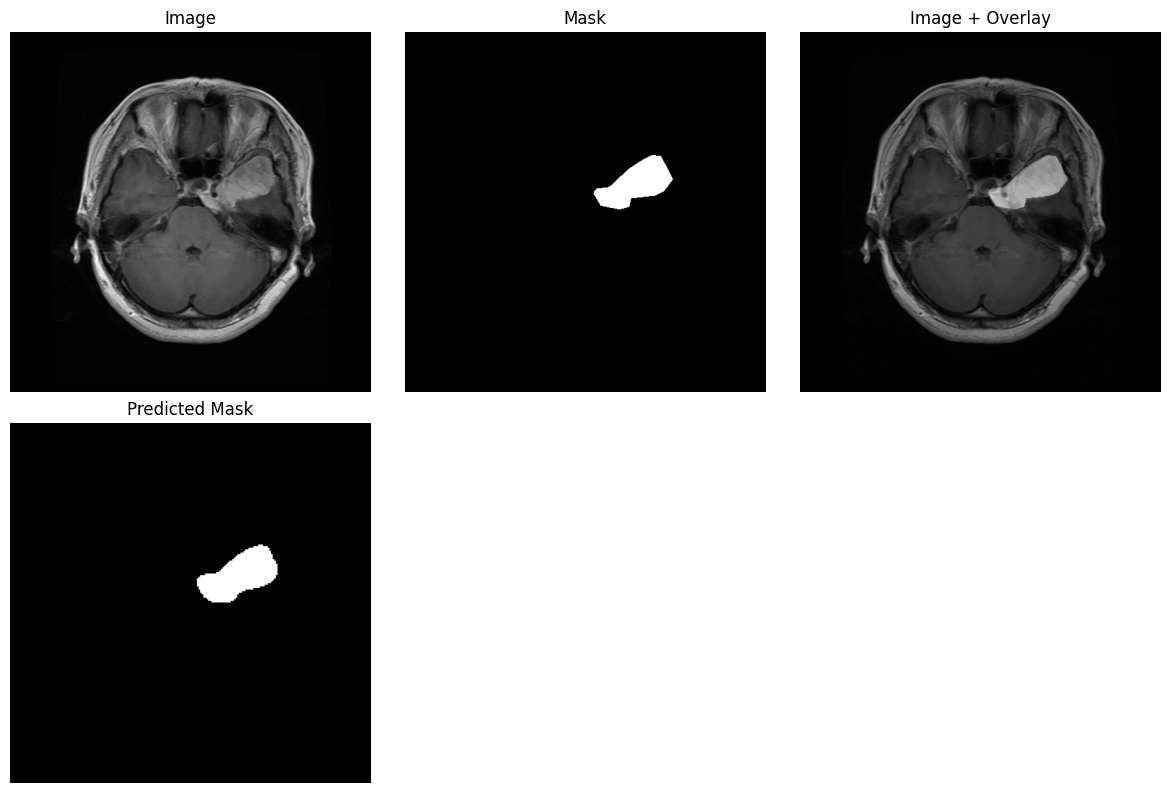

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


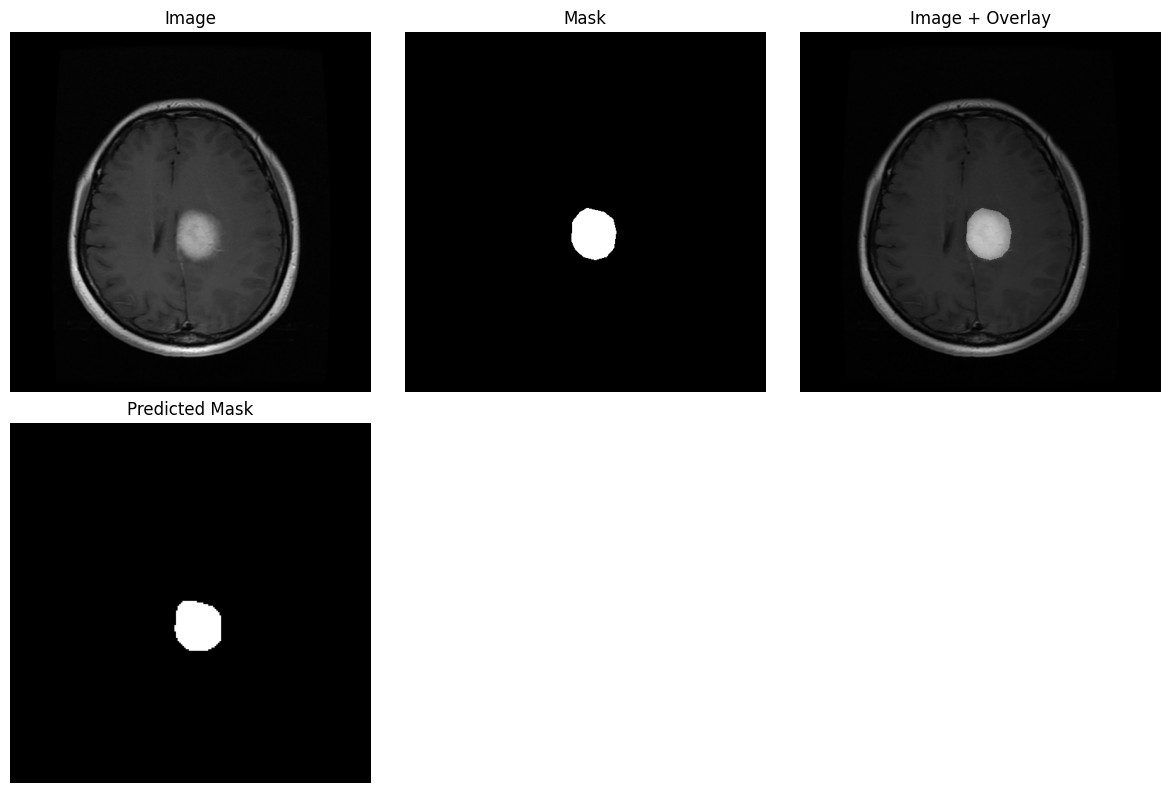

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


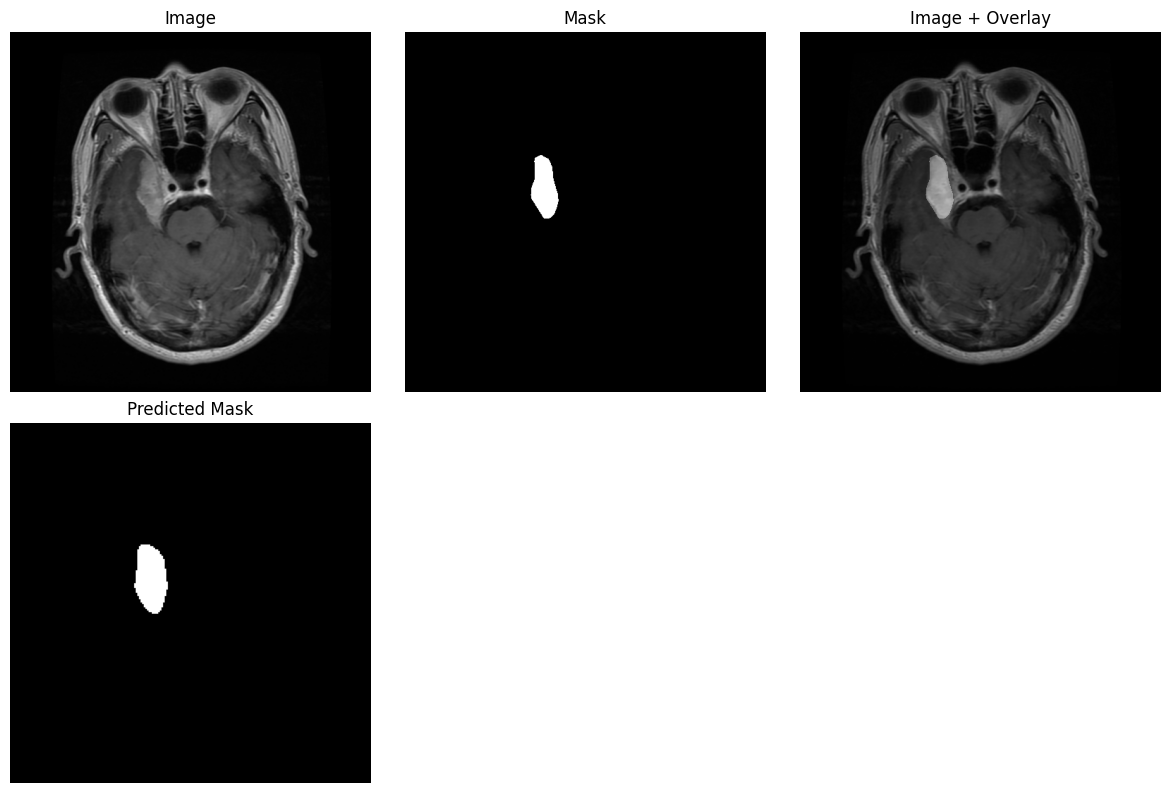

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


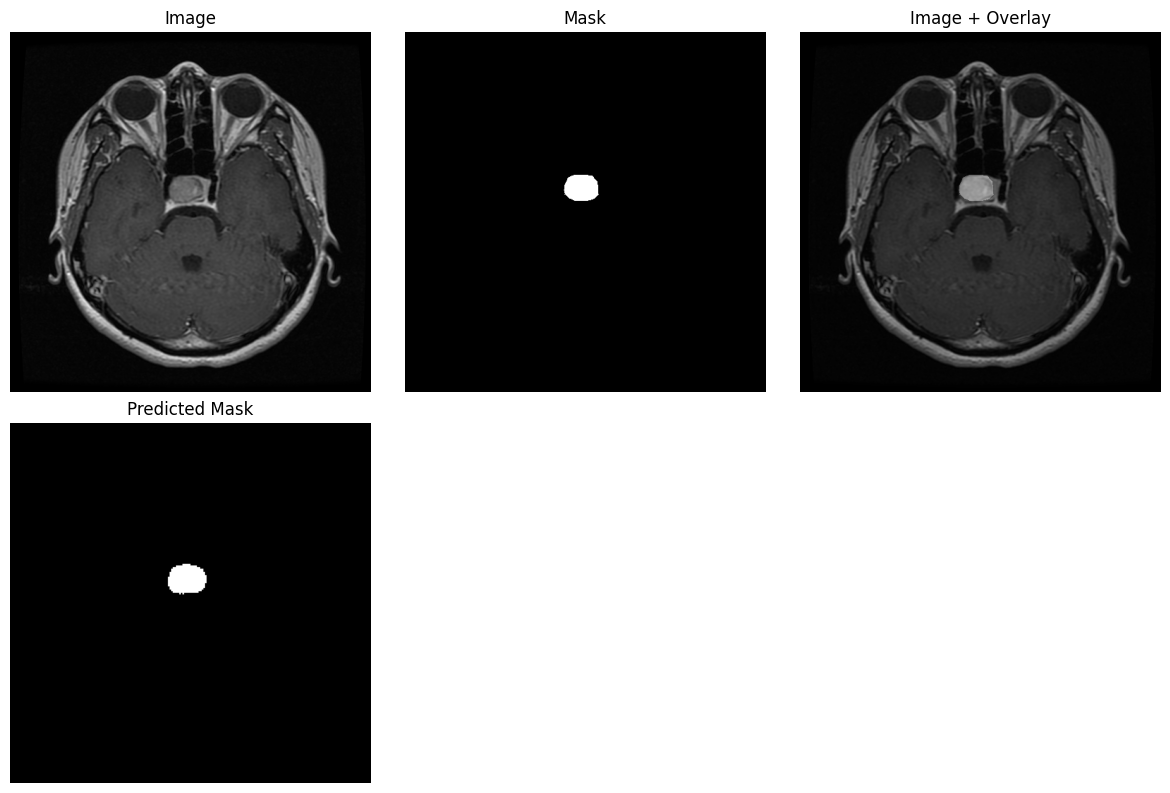

In [7]:
image_path='C:\IIT campus\Second Year\DSGP\Segementation_1\images'
mask_path='C:\IIT campus\Second Year\DSGP\Segementation_1\masks'
display_image_mask(image_path,mask_path,model,image_files,mask_files)
